Выполнила: Тихонова Анна БЭК146 (4 сложная)

# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [834]:
import numpy as np

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [273]:
X = np.array([1,2,0,9,8,0])
max_element(X)

9

In [272]:
def max_element(arr):
    if arr[-1] == 0:
        arr = arr[:-1]
    ind = np.where(arr == 0)[0]
    ind = np.array(list(ind))
    if ind.size:
        return np.max(list(map(lambda i: arr[i+1], ind)))

**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [252]:
X = np.arange(-10,0).reshape((2, 5))
nearest_value(X, -5.4)

-5

In [251]:
def nearest_value(X, v):
    X = X.flatten()
    X_dist = abs(X-v)
    return X[np.argmin(X_dist)]

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [258]:
X = np.random.randint(5, size=(2, 4))
print(X)
print('Стандартное отклонение:', np.std(X, axis=0))

[[4 2 0 0]
 [0 4 2 2]]
Стандартное отклонение: [ 2.  1.  1.  1.]


In [259]:
def scale(X):
    Ones = np.ones(X.shape[0])
    Means = np.outer(Ones, X.mean(axis=0))
    Std = np.outer(Ones, np.std(X, axis=0))
    if 0 in Std:
        return 'В функции есть деление на ноль, невозможно выполнить масштабирование введенной матрицы.'
    else:
        return (X-Means)/Std

In [260]:
print(scale(X))

[[ 1. -1. -1. -1.]
 [-1.  1.  1.  1.]]


**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [269]:
X = np.random.normal(10, 1, size = (5,5))
print(X)

[[  9.18130084   9.57306921  11.60729434  10.93926223  10.73951246]
 [ 10.3060133   10.23586768  10.06600234  10.80223407  10.86563424]
 [  9.03392307   8.59188074  10.11652796  10.98819623   9.49309821]
 [  9.8138192   11.86175607  10.35343237  10.71289141  10.43783668]
 [ 10.93498912   9.91330077  10.44243015  10.99235696   9.69748505]]


In [270]:
get_stats(X)

('Определитель:',
 98.890756126006707,
 'След:',
 49.94407293717866,
 'Наим.эл-т:',
 8.5918807444700036,
 'Наиб.эл-т:',
 11.861756071789893,
 'Норма Фробениуса:',
 51.68226390416428,
 'Собственные числа:',
 array([ 51.53697362+0.j        ,   0.39190301+1.08642411j,
          0.39190301-1.08642411j,  -1.18835335+0.16224263j,
         -1.18835335-0.16224263j]),
 'Обратная матрица:',
 array([[-0.03647232,  0.18277857, -0.40788859, -0.29012743,  0.54716444],
        [-0.12065036, -0.25575591, -0.04178743,  0.47081219, -0.04567085],
        [ 0.63072099, -0.54367137, -0.41935376, -0.04525829,  0.36989625],
        [-0.56440876, -0.16132207,  1.00089494,  0.1507413 , -0.33623826],
        [ 0.12506237,  0.82364278, -0.18031618, -0.27627351, -0.48435786]]))

In [262]:
def get_stats(X):
    return ('Определитель:', np.linalg.det(X), 'След:', np.trace(X) ,'Наим.эл-т:', np.min(X), 'Наиб.эл-т:', np.max(X), 'Норма Фробениуса:', np.linalg.norm(X, ord='fro'), 'Собственные числа:', np.linalg.eigvals(X), 'Обратная матрица:', np.linalg.inv(X))

**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [281]:
dot_matr = []

In [282]:
for exp_num in range(100):
    X = np.random.normal(0, 1, size = (10,10))
    Y = np.random.normal(0, 1, size = (10,10))
    XY = np.dot(X,Y)
    dot_matr.append(np.max(XY))

In [283]:
len(dot_matr)

100

In [285]:
dot_matr[:10]

[5.9976308800465388,
 8.0479239455012159,
 6.4614051421757592,
 6.7723588845207248,
 11.77858216471288,
 8.9757167260229291,
 5.5587422717959925,
 8.7484523764162887,
 10.138258367453782,
 10.02986993513195]

In [284]:
print('Cреднее значение по экспериментам у максимальных элементов =', np.mean(dot_matr))
print('95-процентная квантиль =', np.percentile(dot_matr, 95))

Cреднее значение по экспериментам у максимальных элементов = 8.20932617112
95-процентная квантиль = 11.5809254407


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)



Name 	Description

-  	Year 	1987-2008
-  	Month 	1-12
-  	DayofMonth 	1-31
-  	DayOfWeek 	1 (Monday) - 7 (Sunday)
-  	DepTime 	actual departure time (local, hhmm)
-  	CRSDepTime 	scheduled departure time (local, hhmm)
-  	ArrTime 	actual arrival time (local, hhmm)
-  	CRSArrTime 	scheduled arrival time (local, hhmm)
-  	UniqueCarrier 	unique carrier code
-  	FlightNum 	flight number
-  	TailNum 	plane tail number
-  	ActualElapsedTime 	in minutes
-  	CRSElapsedTime 	in minutes
-  	AirTime 	in minutes
-  	ArrDelay 	arrival delay, in minutes
-  	DepDelay 	departure delay, in minutes
-  	Origin 	origin IATA airport code
-  	Dest 	destination IATA airport code
-  	Distance 	in miles
-  	TaxiIn 	taxi in time, in minutes
-  	TaxiOut 	taxi out time in minutes
-  	Cancelled 	was the flight cancelled?
-  	CancellationCode 	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
-  	Diverted 	1 = yes, 0 = no
-  	CarrierDelay 	in minutes
-  	WeatherDelay 	in minutes
-  	NASDelay 	in minutes
-  	SecurityDelay 	in minutes
-  	LateAircraftDelay 	in minutes

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на вопросы


In [560]:
import pandas as pd

In [561]:
data = pd.read_csv('2008.csv')

In [562]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Так как целевой признак это DepDelay, то поставим его первым столбцом, чтобы было удобно анализировать данные.

In [563]:
data = data[['DepDelay', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

In [564]:
data.head()

,DepDelay,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,16.0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,16.0,2008,6,4,3,1426.0,1410,1730.0,1728,XE,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,-2.0,2008,8,3,7,1143.0,1145,1501.0,1520,WN,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,-3.0,2008,1,23,3,1141.0,1144,1323.0,1335,OO,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,-5.0,2008,5,4,7,815.0,820,1243.0,1300,WN,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


- Имеются ли в данных пропущенные значения?

In [565]:
print('Всего наблюдений:', len(data))

Всего наблюдений: 70000


Метод count считает количество значений в столбцах кроме NaN и None, а значит с его помощью можно быстро посмотреть, сколько есть не пропущенных значений для каждого признака.

По каждому признаку ненулевых наблюдений:

In [566]:
data.count()

DepDelay             68601
Year                 70000
Month                70000
DayofMonth           70000
DayOfWeek            70000
DepTime              68601
CRSDepTime           70000
ArrTime              68444
CRSArrTime           70000
UniqueCarrier        70000
FlightNum            70000
TailNum              69180
ActualElapsedTime    68418
CRSElapsedTime       69991
AirTime              68418
ArrDelay             68418
Origin               70000
Dest                 70000
Distance             70000
TaxiIn               68444
TaxiOut              68594
Cancelled            70000
CancellationCode      1411
Diverted             70000
CarrierDelay         15253
WeatherDelay         15253
NASDelay             15253
SecurityDelay        15253
LateAircraftDelay    15253
dtype: int64

Видно, что NaN или None значений наблюдений в некоторых признаках меньше, чем 70000, что говорит о наличии пропусков в данных.

Для наглядности выведем количество нулевых наблюдений по каждому признаку:

In [567]:
null = len(data) - data.count()
print(null)

DepDelay              1399
Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64


- Сколько всего пропущенных элементов в таблице "объект-признак"?

In [568]:
print('Всего пропущенных значений:', null.sum())

Всего пропущенных значений: 355215


- Сколько объектов имеют хотя бы один пропуск?

Сначала определим, где в таблице есть нулевые значения:

In [569]:
n = data.isnull()

Посчитаем количество пропусков по строкам:

In [570]:
n.any(axis=1).sum()

70000

Таким образом, мы видим, что все объкты в выборке имеют хотя бы один пропуск!

- Сколько признаков имеют хотя бы одно пропущенное значение?

А теперь посчитаем по столбцам:

In [571]:
n.any(axis=0).sum()

16

Можно посмотреть, какие именно признаки имеют пропуски:

In [572]:
for i in data:
    if len(data) - data[i].count() > 0:
        print(i, len(data) - data[i].count())

DepDelay 1399
DepTime 1399
ArrTime 1556
TailNum 820
ActualElapsedTime 1582
CRSElapsedTime 9
AirTime 1582
ArrDelay 1582
TaxiIn 1556
TaxiOut 1406
CancellationCode 68589
CarrierDelay 54747
WeatherDelay 54747
NASDelay 54747
SecurityDelay 54747
LateAircraftDelay 54747


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?

In [573]:
print('Целевая переменная имеет', len(data) - data['DepDelay'].count(), 'пропущенных значений')

Целевая переменная имеет 1399 пропущенных значений


- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

In [574]:
data[data['DepDelay'].isnull()]

,DepDelay,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,NaN,2008,3,6,4,NaN,1605,NaN,1940,AA,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,NaN,2008,1,19,6,NaN,750,NaN,930,EV,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,NaN,2008,7,24,4,NaN,1230,NaN,1355,FL,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,NaN,2008,2,4,1,NaN,620,NaN,758,NW,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,NaN,2008,1,21,1,NaN,1838,NaN,2005,UA,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
194,NaN,2008,1,28,1,NaN,1640,NaN,1719,UA,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
204,NaN,2008,6,13,5,NaN,1229,NaN,1421,OH,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
236,NaN,2008,7,19,6,NaN,544,NaN,917,OO,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
257,NaN,2008,4,19,6,NaN,1345,NaN,1435,AA,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
267,NaN,2008,9,23,2,NaN,1400,NaN,1515,WN,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


Бросается в глаза то, что у тех объектов, у которых пропущено значение целевой переменной 
- отсутствуют и значения у таких признаков как DepTime, ArrTime, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay,	SecurityDelay, LateAircraftDelay
- а так же то, что признак Cancelled = 1, а признак Diverted = 0

Всего пропусков целевой переменной, как мы выяснили ранее, 1399. Но так же, ранее было выделено еще 15 признаков, которые содержали в себе пропуски. Посмотрим, связаны ли пропуски целевой переменной и некоторых признаков. Для этого проверим, сколько пропусков есть одновременно в:

In [575]:
print('DepTime и DepDelay', sum(data.DepTime.isnull() & data.DepDelay.isnull()))
print('ArrDelay и DepDelay', sum(data.ArrDelay.isnull() & data.DepDelay.isnull()))
print('TaxiIn и DepDelay', sum(data.TaxiIn.isnull() & data.DepDelay.isnull()))
print('TaxiOut и DepDelay', sum(data.TaxiOut.isnull() & data.DepDelay.isnull()))
print('CarrierDelay и DepDelay', sum(data.CarrierDelay.isnull() & data.DepDelay.isnull()))
print('WeatherDelay и DepDelay', sum(data.WeatherDelay.isnull() & data.DepDelay.isnull()))
print('NASDelay и DepDelay', sum(data.NASDelay.isnull() & data.DepDelay.isnull()))
print('SecurityDelay и DepDelay', sum(data.SecurityDelay.isnull() & data.DepDelay.isnull()))
print('LateAircraftDelay и DepDelay', sum(data.LateAircraftDelay.isnull() & data.DepDelay.isnull()))

DepTime и DepDelay 1399
ArrDelay и DepDelay 1399
TaxiIn и DepDelay 1399
TaxiOut и DepDelay 1399
CarrierDelay и DepDelay 1399
WeatherDelay и DepDelay 1399
NASDelay и DepDelay 1399
SecurityDelay и DepDelay 1399
LateAircraftDelay и DepDelay 1399


Во всех объектах с пропущенными значениями целевой переменной отсутствуют значения и по рассмотренным нами признакам. Чтобы понять, с чем это может быть связано, рассмотрим еще два, выделенных нами в начале признака, а именно Cancelled (отмененный рейс) и Diverted (отложенный рейс).

In [576]:
print('Cancelled и DepDelay', data[(data.Cancelled==1) & data.DepDelay.isnull()].shape[0])
print('Diverted и DepDelay', data[(data.Diverted ==0) & data.DepDelay.isnull()].shape[0])

Cancelled и DepDelay 1399
Diverted и DepDelay 1399


Получается, что во всех случаях отсутствия данных о целевой пепременной рейсы были отменены или отложены. Чтобы до конца понять взаимосвязь отмены/переноса рейса и отсутствия данных о его зажержке, стоит посмореть, есть ли рейсы о которых имеются данные, но которые согласно значениям признаков были отменены или перенесены.

In [577]:
data[(data.Cancelled==1) & data.DepDelay.notnull()]['DepDelay']

5976     24.0
15680    19.0
16382    38.0
20622    -1.0
22462    -2.0
30057    28.0
33611    -4.0
37581    -1.0
40343    -5.0
50401    -2.0
50810    -7.0
67078     7.0
Name: DepDelay, dtype: float64

In [578]:
data[(data.Diverted==1) & data.DepDelay.notnull()]['DepDelay']

149       68.0
631       15.0
637       15.0
673       -2.0
1083      14.0
1403      -2.0
1784       0.0
1958       2.0
2081       0.0
2131       0.0
2719      36.0
2882      78.0
2965       0.0
3027      37.0
3305      20.0
3585      -4.0
3602      -4.0
4042     138.0
4174      -4.0
4363      -1.0
4555      -6.0
5093      97.0
7058       1.0
7693      -5.0
7733      -3.0
8108      13.0
8822       1.0
8966      25.0
9625       0.0
9844       1.0
         ...  
58291    -11.0
58679      0.0
59056     11.0
59985      0.0
60422     12.0
60801      1.0
61172      0.0
62486     60.0
63003     75.0
63399      0.0
63924     -4.0
64450     33.0
64743     -3.0
65601     -1.0
66160      1.0
66778     86.0
66838     -4.0
66952     -3.0
67258      9.0
67334     20.0
67430      7.0
67680     32.0
67696     26.0
67793     73.0
67850     15.0
68628    -11.0
68853     93.0
69080    120.0
69149     24.0
69978     -5.0
Name: DepDelay, Length: 171, dtype: float64

Отложенных рейсов по которым имеются ненулевые значения целевой переменной достаточно много, а значит нужно будет еще исследовать влияние этого признака на целевую переменную. 

Что же касается признака Cancelled, то только у 12 объектов есть данные по задержке рейса при его отмене. Это означает, что скорее всего этот признак не оказыавет значимого влияния на целевую переменную (учитывая, что всего в выборке 70000 наблюдений), а значит этот признак можно будет удалить в дальнейшем.

То, что если отсутствуют данные о целевой переменной, то отсутствуют и данные по переменным DepTime, ArrTime, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay объясняется как раз тем, что эти рейсы были отменены, а следовательно они просто не имеют данных признаков.

Исключите из выборки объекты с пропущенным значением целевой переменной и со значением целевой переменной, равным 0, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

Удалим объекты с пропускаим в целевой переменной:

In [579]:
data = data[-data.DepDelay.isnull()]

In [580]:
data.shape

(68601, 29)

И удалим объекты с нулевым значением целевой переменной:

In [581]:
data = data[data.DepDelay!=0]

In [582]:
data.shape

(63404, 29)

In [583]:
data.head()

,DepDelay,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,16.0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,16.0,2008,6,4,3,1426.0,1410,1730.0,1728,XE,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,-2.0,2008,8,3,7,1143.0,1145,1501.0,1520,WN,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,-3.0,2008,1,23,3,1141.0,1144,1323.0,1335,OO,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,-5.0,2008,5,4,7,815.0,820,1243.0,1300,WN,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Выделим целевую переменную в отдельную переменную:

In [584]:
y = data.DepDelay

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [585]:
def hhmm_in_hh_mm(column):
    DepTime_Minute = []
    DepTime_Hour = []

    for x in data[column]:
        if not np.isnan(x):
            x = str(int(x))
            DepTime_Minute.append(int(x[-2:]))
            if x[:len(x)-2] == '':
                DepTime_Hour.append(0)
            else:
                DepTime_Hour.append(int(x[:len(x)-2]))
        else:
            DepTime_Hour.append(x)
            DepTime_Minute.append(x)
    return DepTime_Hour, DepTime_Minute

In [586]:
sum(data.DepTime.isnull())

0

Ве объекты с пропусками были удалены на прошлом шаге, но в функции сделана проверна на пропуски.

In [587]:
data['DepTime_Hour'] = hhmm_in_hh_mm('DepTime')[0]
data['DepTime_Minute'] = hhmm_in_hh_mm('DepTime')[1]

data['CRSDepTime_Hour'] = hhmm_in_hh_mm('CRSDepTime')[0]
data['CRSDepTime_Minute'] = hhmm_in_hh_mm('CRSDepTime')[1]

data['ArrTime_Hour'] = hhmm_in_hh_mm('ArrTime')[0]
data['ArrTime_Minute'] = hhmm_in_hh_mm('ArrTime')[1]

data['CRSArrTime_Hour'] = hhmm_in_hh_mm('CRSArrTime')[0]
data['CRSArrTime_Minute'] = hhmm_in_hh_mm('CRSArrTime')[1]

In [588]:
data.head()

,DepDelay,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,16.0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,...,NaN,NaN,21,11,20,55,23.0,8.0,23,0
1,16.0,2008,6,4,3,1426.0,1410,1730.0,1728,XE,...,NaN,NaN,14,26,14,10,17.0,30.0,17,28
2,-2.0,2008,8,3,7,1143.0,1145,1501.0,1520,WN,...,NaN,NaN,11,43,11,45,15.0,1.0,15,20
3,-3.0,2008,1,23,3,1141.0,1144,1323.0,1335,OO,...,NaN,NaN,11,41,11,44,13.0,23.0,13,35
4,-5.0,2008,5,4,7,815.0,820,1243.0,1300,WN,...,NaN,NaN,8,15,8,20,12.0,43.0,13,0


In [589]:
print('Количество признаков:', data.shape[1])

Количество признаков: 37


 Удалим уже замененные признаки:

In [590]:
data.drop(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'], axis = 1, inplace = True)

In [591]:
print('Количество признаков:', data.shape[1])

Количество признаков: 33


Стоит отметить, что разделение на часы и минуты может быть не очень информативным для предсказания целевой переменной. Минуты не дают никакой информации без знания о часах, а значит этот признок может оказаться лишним при обучении модели.

**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [592]:
corr = data.corr()

In [593]:
corr

,DepDelay,Year,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
DepDelay,1.000000,NaN,-0.029528,0.008574,0.008530,0.021166,0.041946,0.034302,0.025237,0.933526,...,0.010668,0.553806,0.203125,-0.017055,0.140084,0.022437,0.070181,0.006171,0.135561,0.008609
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,-0.029528,NaN,1.000000,-0.004838,-0.010617,0.006598,-0.014230,-0.005765,-0.012840,-0.041950,...,0.008620,0.017445,-0.008803,0.002405,-0.006727,0.011477,-0.002887,-0.001491,0.002805,-0.005353
DayofMonth,0.008574,NaN,-0.004838,1.000000,0.015818,0.009847,-0.008110,-0.007024,-0.007842,0.006479,...,-0.007752,0.009641,0.001605,0.006268,0.002206,-0.000784,-0.001435,-0.006125,0.000708,0.001285
DayOfWeek,0.008530,NaN,-0.010617,0.015818,1.000000,-0.005878,0.010330,0.013325,0.011541,0.002943,...,0.005031,0.007566,0.005866,-0.000551,0.005484,-0.000623,0.005762,-0.000901,0.006235,0.000784
FlightNum,0.021166,NaN,0.006598,0.009847,-0.005878,1.000000,-0.324021,-0.331409,-0.336906,0.027777,...,0.009387,-0.022415,-0.003754,-0.006509,-0.011477,-0.002824,-0.019202,0.001697,-0.031454,0.018267
ActualElapsedTime,0.041946,NaN,-0.014230,-0.008110,0.010330,-0.324021,1.000000,0.979979,0.984401,0.089451,...,0.002250,-0.085353,-0.017290,0.000991,-0.016923,0.009981,0.033067,0.000021,0.052552,0.005242
CRSElapsedTime,0.034302,NaN,-0.005765,-0.007024,0.013325,-0.331409,0.979979,1.000000,0.988293,0.010358,...,0.003952,-0.041558,-0.014587,0.001035,-0.011965,0.011929,0.034166,0.002003,0.058308,0.005302
AirTime,0.025237,NaN,-0.012840,-0.007842,0.011541,-0.336906,0.984401,0.988293,1.000000,0.031206,...,0.004590,-0.060884,-0.023179,0.001006,-0.020695,0.011579,0.026744,0.000545,0.045576,0.002669
ArrDelay,0.933526,NaN,-0.041950,0.006479,0.002943,0.027777,0.089451,0.010358,0.031206,1.000000,...,0.008990,0.509705,0.181565,-0.016460,0.119652,0.017466,0.062637,0.002412,0.115969,0.009064


Выберем порог "высокой корреляции" равный 0.5, что действительно свидетельствует о сильной взаимосвязи ответа и признака, и может стать основанием для удаления данного признака из нашего датасета. 

In [594]:
corr_y = corr['DepDelay']
for i in range(len(corr_y)):
    if corr_y[i]>0.5:
        print(corr.keys()[i], corr_y[i])

DepDelay 1.0
ArrDelay 0.933525938482
CarrierDelay 0.532696179045
LateAircraftDelay 0.553805903594


Удалим лишние признаки:

Сначала удалим признаки, которые показали корееляцию с ответом выше выбранного порога:

In [595]:
data.drop(['ArrDelay', 'LateAircraftDelay', 'CarrierDelay'], axis = 1, inplace = True)

Признак Year принимает только одно значение = 2008, а значит никак не влияет на объяснение целевой переменной. Удалим признак Year.
Так же удалим признаки, о которых было сказано в предыдущих пунктах, таких как например Canceled,для которого при его значении =1 для целефой переменной нет данных, а наблюдений с не отсутствующей целевой переменной так мало, что учитывать этот признак не имеет смысла. Так же стоит удалить признаки, которые отвечают за минуты, так как они сами по себе не дают никакой содержательной информации с помощью которой можно было бы объеснить целевую переменную.

In [596]:
data.drop(['Year', 'TailNum', 'DepTime_Minute', 'CRSDepTime_Minute', 'ArrTime_Minute', 'CRSArrTime_Minute', 'Cancelled', 'CancellationCode'], axis = 1, inplace = True)

In [597]:
print('Количество признаков:', data.shape[1])

Количество признаков: 22


Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [598]:
from matplotlib import pyplot as plt

In [599]:
X = data.drop(['DepDelay'], axis=1)

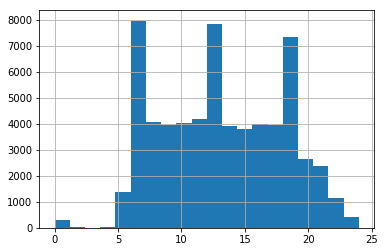

In [600]:
X['DepTime_Hour'].hist(bins=20)
plt.show()

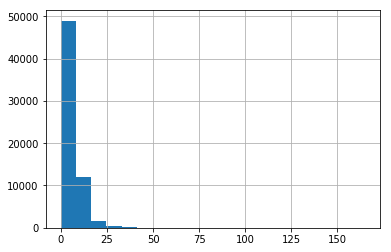

In [601]:
X['TaxiIn'].hist(bins=20)
plt.show()

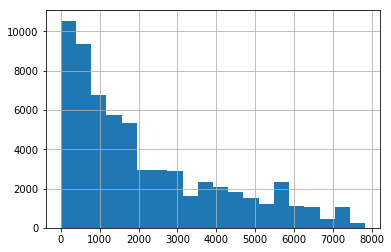

In [602]:
X['FlightNum'].hist(bins=20)
plt.show()

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Большие разбросы в значениях, то есть в одного признака данные имеют большие абсолютные значения в то время как у другого все значения очень маленькие. Например, у признака FlightNum большая часть значений находятся от 0 до 2000, в то время как у признаков TaxiIn и DepTime_Hour в среднем значения около 10 или 20. 
Такие различия приведут к тому, что признак с большими абсолютными значениями будет при обучении влиять на переменную больше, а влияние переменной с маленькими значениями может вообще не учитываться практически при обучении, хотя в реальности эти переменные могут влиять на объясняемую в одинаковой степени. 
Масштабирование помогает избежать описанных выше различий в степени влияния, приводит данные к одному масштабу, что помогает более точно оценить значимость колебаний признака в объяснении колебаний целевой переменной.

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [603]:
from sklearn.preprocessing import StandardScaler

In [704]:
def transform_data(data):
    #находим вещественные признаки
    num = data._get_numeric_data().fillna(value=0)
    g = data.index
    num = pd.DataFrame(num)

    #заменяем и масштабируем вещественные
    num_n = StandardScaler().fit_transform(num)
    num_n = pd.DataFrame(num_n, index = g)
    num_n.columns = num.columns

    #заменяем категориальные
    not_num = pd.DataFrame()
    for i in data.columns:
        if i not in num.columns:
            data[i].fillna(value='nan')
            not_num[i]=data[i]

    #кодируем категориальные
    d = []
    for i in range(63404):
        d.append(i)
    cat_dum = pd.DataFrame()
    for a in not_num.columns:
        dum = pd.get_dummies(not_num[a], prefix=a)
        for b in dum.keys():
            cat_dum[b]=dum[b]
            num_n[b] = dum[b]

    return num_n

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [721]:
X_new = transform_data(X)
X_new.shape

(63404, 631)

Из-за того, что у некоторых категориальных признаков было много уникальных значений, получилось достаточно много признаков, а именно 631. В целом такое количество признаков не очень хорошо, учитывая, что много различных признаков было создано по категориальным значениям, которые могли встречаться всего у нескольких наблюдений  

**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [723]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [710]:
from sklearn.linear_model import LinearRegression

In [711]:
from sklearn.metrics import mean_squared_error, r2_score

Обучим линейную регрессию по 1000 наблюдениям из обучающей выборки:

In [724]:
lin_regr = LinearRegression().fit(X_train[:1000], y_train[:1000])

In [725]:
y_pred = lin_regr.predict(X_test)

А теперь найдем требуемые метрики качества:

In [726]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

MSE: 3.31622403245e+29
R^2: -2.73020356722e+26


А теперь построим модель и найдем метрики на всей контрольной выборке:

In [727]:
lin_regr_all = LinearRegression().fit(X_train, y_train)
y_pred = lin_regr_all.predict(X_test)

In [728]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('R^2', r2_score(y_test, y_pred))

MSE: 932.302023962
R^2 0.232448023219


MSE для 1000 объектов значительно меньше MSE для случая обучения на всей выборке, так же как и значение R^2 значительно больше, когда мы проводим обучение используя всю выборку.

Интерпретировать качество модели с помощью MSE достаточно сложно, однако понятно, что чем меньше значение MSE, тем модель лучше, а значит могласно этой метрике качества модель обученная на 100 объектах лучше, чем модель обученная на всех объектах.То, что R^2 принимает отрицательные значения само по себе странно, так как его значение должно находиться в диапазоне от 0 до 1. Попробуем посмотреть на веса.

In [729]:
max(lin_regr.coef_)

558249540258632.25

In [730]:
min(lin_regr.coef_)

-178308961063701.34

In [731]:
np.mean(lin_regr.coef_)

758973640838.65625

In [732]:
np.median(lin_regr.coef_)

0.0

Так как значения коэффициентов очень разные, то некоторые признаки из модели получили слишком большие веса, что показано выше. Такие огромные веса свидетельствуют о переобучении модели!!!

### Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [733]:
from sklearn.linear_model import LassoCV, RidgeCV

In [735]:
from sklearn.cross_validation import KFold
import sklearn
from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV

Попробуем сначала просто добавить в модель регуляризацию без дополничельного подбора оптимальных значений альфа:

In [736]:
L1 = LassoCV()
L2 = RidgeCV()

In [737]:
L1.fit(X_train[:1000], y_train[:1000])
y_pred = L1.predict(X_test)

Для регрессии с Lasso:

In [738]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

MSE: 972.169595563
R^2: 0.199625576625


In [739]:
L2.fit(X_train[:1000], y_train[:1000])
y_pred = L2.predict(X_test)

Для регрессии Ridge:

In [740]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

MSE: 971.710480959
R^2: 0.200003559631


Сравним полученные результаты с метриками на регрессиях без регуляризации:
Значение R^2: -2.73020356722e+26 без регуляризации, а с ней 
- при Lasso R^2: 0.199625576625
- при Ridge R^2: 0.200003559631
что свидеельствует об улучшении качества модели.

А теперь с помощью GridSearch подберем оптимаьлные значения альфа и посмтроим регрессию с найденными значениями.

In [741]:
L2_n = sklearn.linear_model.Ridge()

In [796]:
L1_n = sklearn.linear_model.Lasso()

In [797]:
cv = cross_validation.KFold(n=1000, n_folds=10, random_state=14, shuffle=True)
alphas_R = GridSearchCV(L2_n, {'alpha': np.arange(10, 140, 5)}, cv = cv,scoring='r2')
alphas_L = GridSearchCV(L1_n, {'alpha': np.arange(10, 140, 5)}, cv = cv,scoring='r2')

In [798]:
alphas_R.fit(X_train[:1000],y_train[:1000])
alphas_L.fit(X_train[:1000],y_train[:1000])

GridSearchCV(cv=sklearn.cross_validation.KFold(n=1000, n_folds=10, shuffle=True, random_state=14),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [800]:
alphas_R1 = pd.DataFrame(alphas_R.cv_results_)
alphas_L1 = pd.DataFrame(alphas_L.cv_results_)
print('R^2 для Ridge:', np.mean(alphas_R1.mean_test_score))
print('R^2 для Lasso:', np.mean(alphas_L1.mean_test_score))

R^2 для Ridge: 0.268392501774
R^2 для Lasso: 0.000634094439195


Итак, подводя итог можно сказать, что согласно метрикам качества построенных моделей, 
- линейные регрессии без регуляризации склонны к переобучению о чем свидетельствуют огромные значения весов (в то время как признаки у нас масштабированные и имеют небольшие и не сильно различающиеся значения). Метрики качества на моделях без регуляризации ведут себя не вполне адекватно и как при обучении на всей выборке, так и при обучении на 1000 объектах показывают плохие результаты.
- линейный модели с регуляризацией помогают справиться с возникавшей прежде проблемой. Ridge регрессия производит отбор некоторых признаков, что так же в итоге помогает улучшить качество модели. Значения MSE и R^2 уже значительно лучше, хотя R^2 все еще достаточно близок к нулю.
- при подборе альф для Ridge регрессии показатель R^2 вырос, а значит модель обучается лучше с подобранными GridSearch-ем значиниями альфа.

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [747]:
X_new['One'] = np.ones(X_new.shape[0])
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)

**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [843]:
?np.dot()

In [847]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return np.dot(X, w)

In [846]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    MSPE = 0
    len_X = X.shape[0]
    for i in range(len_X):
        MSPE = MSPE + (((y[i]- make_pred(X,w)[i])/y[i])**2)
    MSPE = MSPE/len_X
    return(MSPE)

In [862]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    MSPE_grad = 0
    len_X = X.shape[0]
    for i in range(len_X):
        MSPE_grad = MSPE_grad - (2/len_X)*(X.loc[i,]/y[i])+2*make_pred(X**2,w)[i]/y**2
    return MSPE_grad

In [864]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    MSPE_reg = 0
    len_X = X.shape[0]
    for i in range(len_X):
        MSPE_reg = MSPE_reg + (((y[i]- make_pred(X,w)[i])/y[i])**2)+numpy.linalg.norm(w[i], 2)**2
    MSPE_reg = MSPE_reg/len_X
    return(MSPE_reg)

In [865]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    MSPE_grad_reg = 0
    len_X = X.shape[0]
    for i in range(len_X):
        MSPE_grad_reg = MSPE_grad_reg - (2/len_X)*(X.loc[i,]/y[i])+2*make_pred(X**2,w)[i]/y**2+2*w[i]
    return MSPE_grad_reg

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [866]:
def grad_descent(X, y, eps, step_size, max_iter, is_reg):
    func_value = []
    w_new = [1 for x in range(X.shape[1])]
    if is_reg:
        for i in range(max_iter):
            w = w_new
            w_new = w - step_size*get_reg_grad(w, X, y)
            func_value.append(get_reg_func(w_new, X, y))
            if  np.linalg.norm(w_new - w) < eps:
                break    
    else:
        for i in range(max_iter):
            w = w_new
            w_new = w - step_size*get_grad(w, X, y)
            func_value.append(get_func(w_new, X, y))
            if  np.linalg.norm(w_new - w) < eps:
                break       
    return  w_new, func_value

Итак, сначала попробуем просто построить нашу линейную регрессионную модель, установив небольшое число итераций (20) и шаг 1:

In [884]:
w_pred, MSPE = grad_descent(X_train, y_train, eps=0.000001, step_size=1, max_iter=20, is_reg = True)

In [887]:
plt.plot(MSPE)

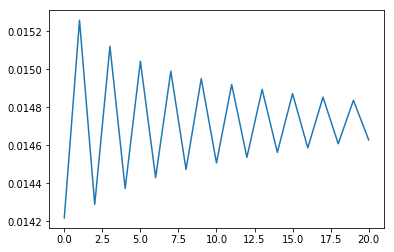

In [889]:
plt.show()

Значение ошибки сходится, что свидетельствует о том, что градиет равботает правильно и возможно при большем количестве тераций можно получить картинку еще лучше.

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

Теперь уставином, как сказано в задании разные размеры шага и посмотрим на график, построенный по значениям ошибки на каждой итерации:

Установим шаг 0.001, следаем побольше итераций и посмтроим график:

In [911]:
w_1, MSPE_1 = grad_descent(X_train, y_train, eps=0.000001, step_size=0.001, max_iter=100,is_reg = False)

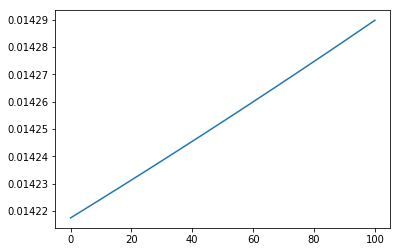

In [912]:
plt.plot(MSPE_1)
plt.show()

Судя по графику ошибка только растет. Попробуем другие размеры шага.

Установим шаг = 1:

In [895]:
w_2, MSPE_2 = grad_descent(X_train, y_train, eps=0.000001, step_size=1, max_iter=100,is_reg = False)

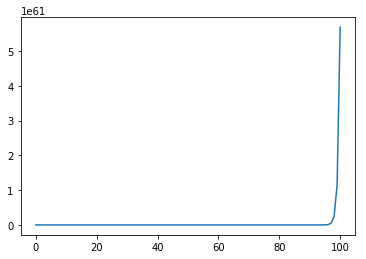

In [896]:
plt.plot(MSPE_2)
plt.show()

И шаг равный 10:

In [897]:
w_3, MSPE_3 = grad_descent(X_train, y_train, eps=0.000001, step_size=10, max_iter=100,is_reg = False)

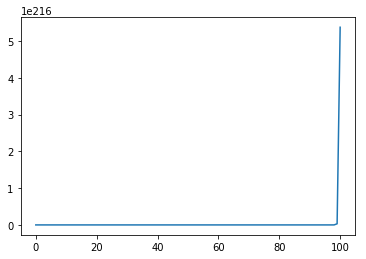

In [898]:
plt.plot(MSPE_3)
plt.show()

График выглядит странно, около 100 шага ее значение резко "взлетает", а до этого равно 0. Значит данные размеры шагов не подходят для оптимальной работы алгорится графиентного спуска.

Вероятно проблема в отсутствии регуляризации, которая справлялась с переобучением модели. Попробуем теперь рассмотреть графики с регуляризацие. Ожидаем, что графики будут выглядеть значительно лучше, так как для самаого первого графика, в котором мы применили регуляризацию, все выглядело очень даже неплохо. 

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

Возьмем количетво итераций = 60:

Для шага 1:

In [913]:
w_4, MSPE_4 = grad_descent(X_train, y_train, eps=0.000001, step_size=1, max_iter=60, is_reg = True)

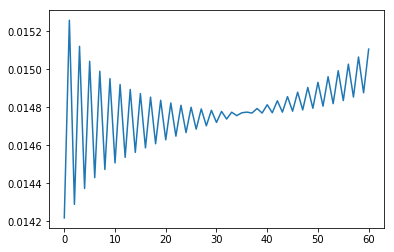

In [900]:
plt.plot(MSPE_4)
plt.show()

Видим, что до 40 итерации все выглядит очень даже неплохо:)

Для шага 10:

In [914]:
w_5, MSPE_5 = grad_descent(X_train, y_train, eps=0.000001, step_size=10, max_iter=60, is_reg = True)

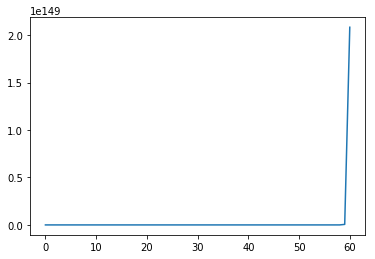

In [902]:
plt.plot(MSPE_5)
plt.show()

In [915]:
w_6, MSPE_6 = grad_descent(X_train, y_train, eps=0.000001, step_size=0.001, max_iter=60, is_reg = True)

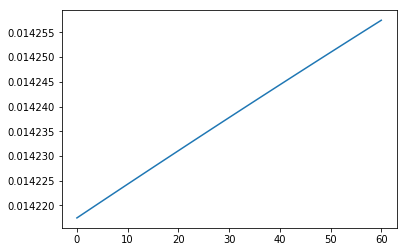

In [904]:
plt.plot(MSPE_6)
plt.show()

Для размеров шага 0.001 и 10 не получилось нормальных графиков, из чего можно сделать вывод, что шаг 1 является более оптимальным в данной ситуации.

В целом нельзя сказать, что регуляризация помогла во всех случаях и для разных шагов, однако для шага 1 все же введение регуляризации привело к значительному улучшени предсказаний.

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [ ]:
# Your code here